# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [3]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [5]:
websites = pd.read_csv('./datasets/website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [7]:
# What the dataset looks like?
print("Dimensiones del dataset:", websites.shape)
websites.sample(10)

Dimensiones del dataset: (1781, 21)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
60,B0_2127,25,6,us-ascii,Microsoft-IIS/7.5,324.0,US,Massachusetts,25/02/2008 0:00,26/02/2017 0:00,...,2,4,474,5,4,250,474,5,0.0,0
529,B0_2323,40,6,utf-8,NaN,NaN,NaN,NaN,22/02/1996 0:00,16/01/2015 0:00,...,4,8,924,12,10,642,924,12,0.0,0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
904,B0_371,50,10,iso-8859-1,nginx,243.0,US,Wisconsin,21/05/2007 21:12,27/03/2014 15:06,...,8,2,2382,17,20,7775,2682,17,4.0,0
351,B0_1204,37,9,ISO-8859-1,Apache,1002.0,AT,Austria,1/06/2004 0:00,2/06/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1531,M0_63,84,15,UTF-8,Apache/2.2.22 (Debian),11323.0,US,Washington,8/03/2003 0:00,9/03/2017 0:00,...,0,5,2262,29,27,33205,2588,29,4.0,1
726,B0_724,45,10,UTF-8,mw2233.codfw.wmnet,NaN,US,CA,13/01/2001 0:12,12/12/2015 10:16,...,29,2,5852,42,39,37285,6460,42,8.0,0
228,B0_1288,33,6,utf-8,Apache/2.4,19890.0,CA,BC,20/04/2000 0:00,25/04/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1667,B0_1292,103,17,utf-8,Apache/2.2.10 (Linux/SUSE),NaN,BE,NaN,16/01/2001 0:00,7/04/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1192,B0_2053,60,12,UTF-8,nginx,NaN,US,CA,12/12/2003 0:00,18/10/2016 0:00,...,6,5,696,8,9,574,696,8,0.0,0


In [8]:
# What are the data types?
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [9]:
# Which columns contain the features of the websites?
set(websites.columns) - {'Type'}

{'APP_BYTES',
 'APP_PACKETS',
 'CHARSET',
 'CONTENT_LENGTH',
 'DIST_REMOTE_TCP_PORT',
 'DNS_QUERY_TIMES',
 'NUMBER_SPECIAL_CHARACTERS',
 'REMOTE_APP_BYTES',
 'REMOTE_APP_PACKETS',
 'REMOTE_IPS',
 'SERVER',
 'SOURCE_APP_BYTES',
 'SOURCE_APP_PACKETS',
 'TCP_CONVERSATION_EXCHANGE',
 'URL',
 'URL_LENGTH',
 'WHOIS_COUNTRY',
 'WHOIS_REGDATE',
 'WHOIS_STATEPRO',
 'WHOIS_UPDATED_DATE'}

In [10]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
predict_column = 'Type'


In [11]:
# 0 for bening 1 for maliciuos websites

In [12]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
categorical_columns = ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
numerical_columns = list(set(websites.columns) - set(categorical_columns) - {'Type'})

print(f"Categóricas: {categorical_columns}")
print(f"Numéricas: {numerical_columns}")

Categóricas: ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
Numéricas: ['APP_BYTES', 'REMOTE_IPS', 'CONTENT_LENGTH', 'REMOTE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE', 'SOURCE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'NUMBER_SPECIAL_CHARACTERS', 'DNS_QUERY_TIMES', 'APP_PACKETS', 'DIST_REMOTE_TCP_PORT', 'URL_LENGTH']


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

Text(0.5, 1.0, 'Correlación entre Variables Numéricas')

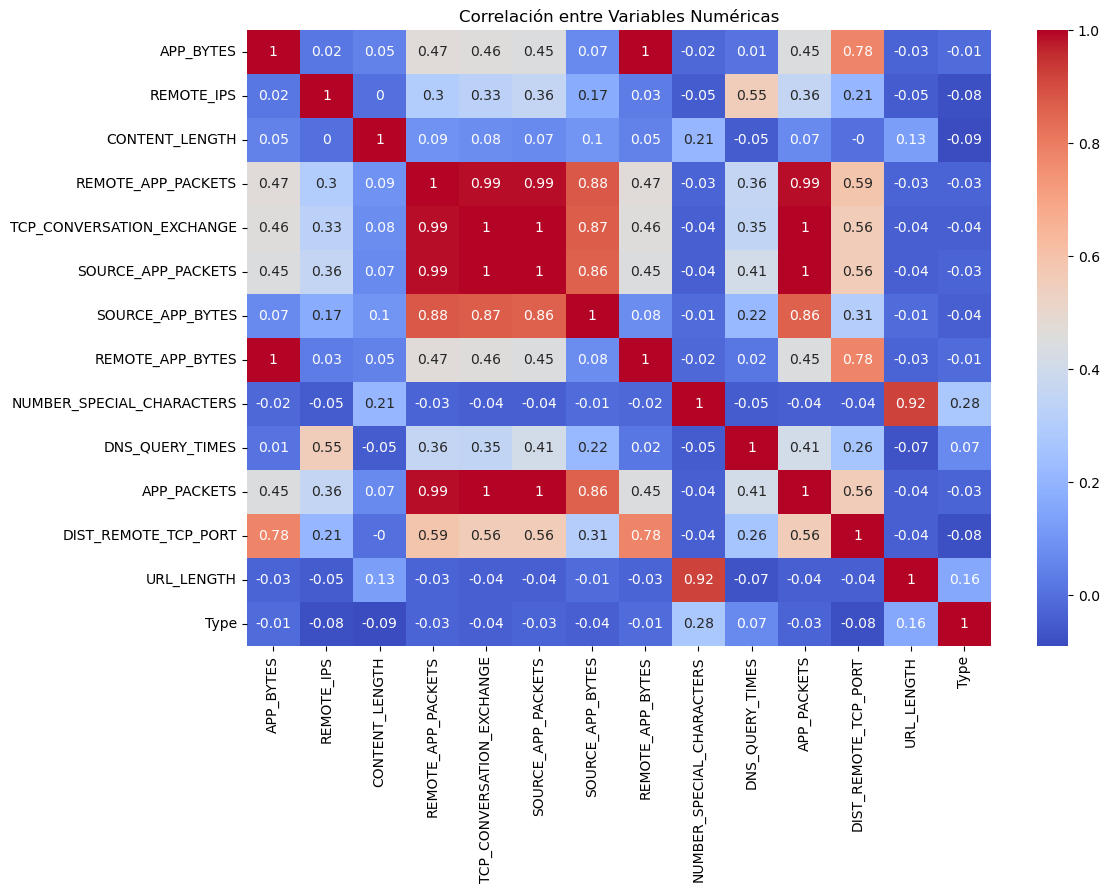

In [14]:
# Un mapa de calor
correlation_matrix = websites[numerical_columns + ['Type']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables Numéricas")

### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [16]:
#! pip install xgboost
import xgboost as xgb

In [17]:
X = websites._get_numeric_data().drop('Type', axis=1)   # eliminamos las no numéricas y la target
y = websites.Type

In [18]:
model = xgb.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
sort_idx = model.feature_importances_.argsort()

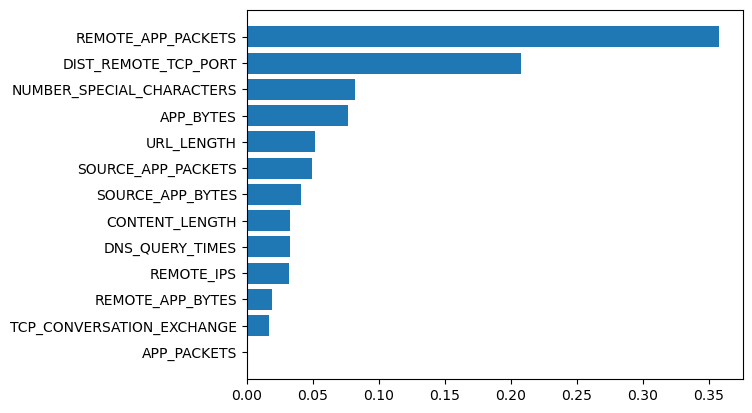

In [20]:
plt.barh(X.columns[sort_idx],model.feature_importances_[sort_idx])
plt.show();

In [21]:
# REMOTE_APP_PACKETS parece ser la más relevante

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [24]:
"""# Your code here
for col in ['SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'APP_PACKETS']:
    print(f"Sin la variable {col}")
    websites_var = websites_numonly.drop(columns=col)
    sns.heatmap(websites_var.corr().round(2), annot=True)
    plt.show()"""

'# Your code here\nfor col in [\'SOURCE_APP_PACKETS\', \'REMOTE_APP_PACKETS\', \'APP_PACKETS\']:\n    print(f"Sin la variable {col}")\n    websites_var = websites_numonly.drop(columns=col)\n    sns.heatmap(websites_var.corr().round(2), annot=True)\n    plt.show()'

In [25]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY
"""a_eliminar = ['SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS',
              'NUMBER_SPECIAL_CHARACTERS',     # correlación alta con URL_LENGTH
              'SOURCE_APP_BYTES',              # correlación alta con TCP_CONVERSATION_EXCHANGE
             ]
websites_clean = websites_numonly.drop(columns=a_eliminar)
sns.heatmap(websites_clean.corr().round(2), annot=True)
plt.show()"""

to_drop = ['APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES',  # Basado en análisis visual
           'NUMBER_SPECIAL_CHARACTERS',     # correlación alta con URL_LENGTH
              'SOURCE_APP_BYTES',              # correlación alta con TCP_CONVERSATION_EXCHANGE
             ]
websites = websites.drop(columns=to_drop)
print("Columnas eliminadas por alta colinealidad:", to_drop)

Columnas eliminadas por alta colinealidad: ['APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES', 'NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_BYTES']


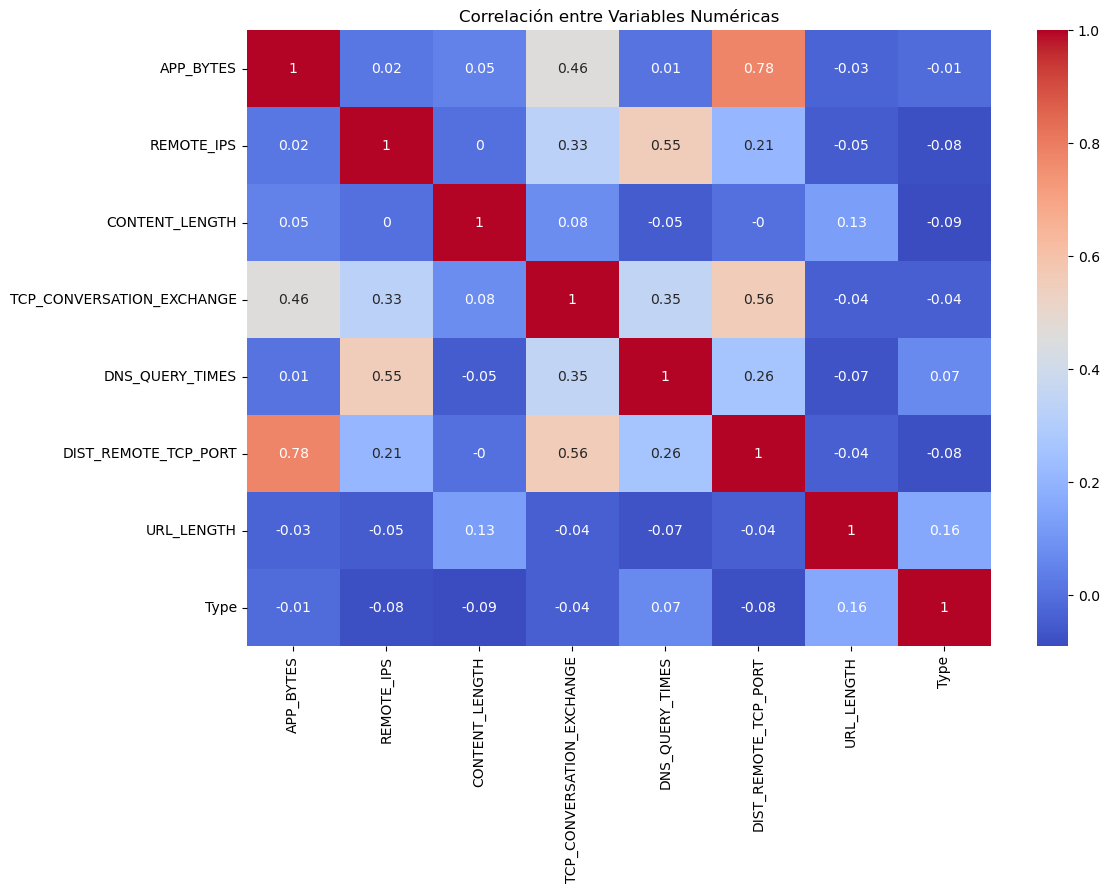

In [26]:
numerical_columns_filtered = [col for col in numerical_columns if col not in to_drop]

correlation_matrix = websites[numerical_columns_filtered + ['Type']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables Numéricas")
plt.show()

# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [28]:

# Your code here
websites.info()

# Observamos que CONTENT_LENGTH y DNS_QUERY_TIMES tienen nulos. El DNS_QUERY_TIMES solo un nulo.

websites.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   CHARSET                    1774 non-null   object 
 3   SERVER                     1605 non-null   object 
 4   CONTENT_LENGTH             969 non-null    float64
 5   WHOIS_COUNTRY              1475 non-null   object 
 6   WHOIS_STATEPRO             1419 non-null   object 
 7   WHOIS_REGDATE              1654 non-null   object 
 8   WHOIS_UPDATED_DATE         1642 non-null   object 
 9   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 10  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 11  REMOTE_IPS                 1781 non-null   int64  
 12  APP_BYTES                  1781 non-null   int64  
 13  DNS_QUERY_TIMES            1780 non-null   float

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,8.0,0
4,B0_403,17,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,4.0,0


In [29]:
missing_values = websites.isnull().sum()
print("Valores faltantes después de ajustar columnas:\n", missing_values)


Valores faltantes después de ajustar columnas:
 URL                            0
URL_LENGTH                     0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [30]:
# Firts we will drop the columns with more than 50% of missing data
threshold = 0.5 * websites.shape[0]
websites = websites.drop(columns=[col for col in websites.columns if websites[col].isnull().sum() > threshold])

In [31]:
# Now we will drop the rows with missing data
websites_clean = websites.copy().dropna()
websites_clean

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,8.0,0
6,B0_462,18,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,2.0,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0.0,0
11,B0_1102,20,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/11/2016 0:00,23/11/2016 0:00,0,0,0,0,0.0,0
16,M0_97,21,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,6,0,2,603,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,B0_2233,143,ISO-8859-1,AkamaiGHost,374.0,US,DC,15/06/2006 0:00,22/06/2016 0:00,6,5,2,564,0.0,0
1762,B0_221,146,UTF-8,nginx,11833.0,US,Arizona,13/07/1998 0:00,28/03/2017 0:00,29,20,8,4167,4.0,0
1774,B0_156,183,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,22,2,7,2062,8.0,0
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,4.0,0


In [32]:
websites_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 3 to 1780
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        636 non-null    object 
 1   URL_LENGTH                 636 non-null    int64  
 2   CHARSET                    636 non-null    object 
 3   SERVER                     636 non-null    object 
 4   CONTENT_LENGTH             636 non-null    float64
 5   WHOIS_COUNTRY              636 non-null    object 
 6   WHOIS_STATEPRO             636 non-null    object 
 7   WHOIS_REGDATE              636 non-null    object 
 8   WHOIS_UPDATED_DATE         636 non-null    object 
 9   TCP_CONVERSATION_EXCHANGE  636 non-null    int64  
 10  DIST_REMOTE_TCP_PORT       636 non-null    int64  
 11  REMOTE_IPS                 636 non-null    int64  
 12  APP_BYTES                  636 non-null    int64  
 13  DNS_QUERY_TIMES            636 non-null    float64
 14

#### De nuevo, examina el número de valores que faltan en cada columna. 

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [34]:
# Examine missing values in each column
# Todo ok
websites_clean.head()

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,8.0,0
6,B0_462,18,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,2.0,0
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0.0,0
11,B0_1102,20,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,CO,22/11/2016 0:00,23/11/2016 0:00,0,0,0,0,0.0,0
16,M0_97,21,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,6,0,2,603,2.0,1


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [37]:
websites_clean.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
AT                  4
IN                  4
SC                  2
UA                  2
CN                  2
us                  2
BS                  2
UY                  2
UG                  1
TR                  1
KY                  1
UK                  1
SI                  1
RU                  1
IL                  1
HK                  1
NL                  1
IT                  1
DE                  1
BE                  1
NO                  1
BY                  1
AE                  1
IE                  1
PH                  1
Name: count, dtype: int64

In [38]:
websites_clean.WHOIS_COUNTRY

3       US
6       US
7       US
11      US
16      RU
        ..
1754    US
1762    US
1774    US
1778    US
1780    US
Name: WHOIS_COUNTRY, Length: 636, dtype: object

In [39]:
# Your code here
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

websites_clean.loc[:,'WHOIS_COUNTRY'] = websites_clean['WHOIS_COUNTRY'].apply(lambda x: good_country.get(x, 'OTHER'))


Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

In [41]:
# Your code here
def print_bar_plot(x,y):
    plt.bar(x, y)
    plt.figure(figsize=(15,15))
    return plt.show()

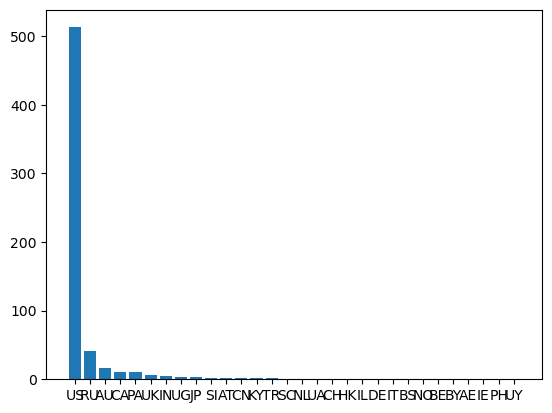

<Figure size 1500x1500 with 0 Axes>

In [42]:
print_bar_plot(websites_clean.WHOIS_COUNTRY.unique(),websites_clean.WHOIS_COUNTRY.value_counts());

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [44]:
# Your code here
#websites = websites.copy()
websites_clean.loc[:,'country'] = websites_clean.WHOIS_COUNTRY.apply(lambda c : c if c in websites_clean.WHOIS_COUNTRY.value_counts()[:10] else 'OTHER')
websites_clean.drop(columns='WHOIS_COUNTRY', inplace=True)
websites_clean



,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type,country
3,B0_113,17,ISO-8859-1,nginx,162.0,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,8.0,0,US
6,B0_462,18,iso-8859-1,Apache/2,345.0,CO,29/07/2002 0:00,1/07/2016 0:00,12,0,3,1189,2.0,0,US
7,B0_1128,19,us-ascii,Microsoft-HTTPAPI/2.0,324.0,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0.0,0,US
11,B0_1102,20,us-ascii,Microsoft-HTTPAPI/2.0,324.0,CO,22/11/2016 0:00,23/11/2016 0:00,0,0,0,0,0.0,0,US
16,M0_97,21,iso-8859-1,nginx,686.0,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,6,0,2,603,2.0,1,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,B0_2233,143,ISO-8859-1,AkamaiGHost,374.0,DC,15/06/2006 0:00,22/06/2016 0:00,6,5,2,564,0.0,0,US
1762,B0_221,146,UTF-8,nginx,11833.0,Arizona,13/07/1998 0:00,28/03/2017 0:00,29,20,8,4167,4.0,0,US
1774,B0_156,183,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,NY,26/06/1997 0:00,18/11/2014 0:00,22,2,7,2062,8.0,0,US
1778,B0_162,201,utf-8,Apache/2.2.16 (Debian),8904.0,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,4.0,0,US


In [45]:
print(f"Nos quedan {len(websites_clean.country.unique())} paises")

Nos quedan 11 paises


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [47]:
# Your code here
websites_clean.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [49]:
websites_clean.dtypes

URL                           object
URL_LENGTH                     int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
DNS_QUERY_TIMES              float64
Type                           int64
country                       object
dtype: object

In [50]:
websites_clean.URL.value_counts()


URL
B0_676     1
B0_113     1
B0_462     1
B0_1128    1
B0_1102    1
          ..
B0_1353    1
B0_966     1
M0_94      1
B0_1020    1
B0_2228    1
Name: count, Length: 636, dtype: int64

In [51]:
websites_clean.CHARSET.value_counts()

CHARSET
UTF-8           200
ISO-8859-1      169
utf-8           108
us-ascii         92
iso-8859-1       66
windows-1251      1
Name: count, dtype: int64

In [52]:
websites_clean.SERVER.value_counts()

SERVER
Apache                                                           162
Microsoft-HTTPAPI/2.0                                             76
nginx                                                             59
GSE                                                               46
Microsoft-IIS/7.5                                                 39
                                                                ... 
Boston.com Frontend                                                1
My Arse                                                            1
Apache/2.4.17 (Unix) OpenSSL/1.0.1e-fips PHP/5.6.19                1
Microsoft-IIS/7.5; litigation_essentials.lexisnexis.com  9999      1
Apache/2.2.16 (Debian)                                             1
Name: count, Length: 120, dtype: int64

#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [54]:
# Eliminamos URL ya que todos son valores únicos
websites_clean.drop(columns='URL', inplace=True)

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [56]:
websites_clean.CHARSET.unique()

array(['ISO-8859-1', 'iso-8859-1', 'us-ascii', 'utf-8', 'UTF-8',
       'windows-1251'], dtype=object)

In [57]:
# Unificamos los sinónimos
charset_sinonimos = { 
    'ISO-8859-1': 'iso-8859-1',
    'UTF-8':'utf-8'
}
websites_clean['CHARSET'] = websites_clean.CHARSET.apply(lambda x : charset_sinonimos.get(x, x))
websites_clean

,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type,country
3,17,iso-8859-1,nginx,162.0,31,22,3,3812,8.0,0,US
6,18,iso-8859-1,Apache/2,345.0,12,0,3,1189,2.0,0,US
7,19,us-ascii,Microsoft-HTTPAPI/2.0,324.0,0,0,0,0,0.0,0,US
11,20,us-ascii,Microsoft-HTTPAPI/2.0,324.0,0,0,0,0,0.0,0,US
16,21,iso-8859-1,nginx,686.0,6,0,2,603,2.0,1,OTHER
...,...,...,...,...,...,...,...,...,...,...,...
1754,143,iso-8859-1,AkamaiGHost,374.0,6,5,2,564,0.0,0,US
1762,146,utf-8,nginx,11833.0,29,20,8,4167,4.0,0,US
1774,183,iso-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,22,2,7,2062,8.0,0,US
1778,201,utf-8,Apache/2.2.16 (Debian),8904.0,83,2,6,6631,4.0,0,US


In [58]:
print(f"Pequeña comprobación: {websites_clean.CHARSET.unique()=}")

Pequeña comprobación: websites_clean.CHARSET.unique()=array(['iso-8859-1', 'us-ascii', 'utf-8', 'windows-1251'], dtype=object)


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [60]:
websites_clean.SERVER.unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0',
       'Apache/2.4.7 (Ubuntu)', 'Apache',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22', 'Microsoft-IIS/7.5', 'nginx/1.12.0',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.4.25 (Amazon) PHP/7.0.14',
       'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3', 'ATS',
       'CherryPy/3.6.0', 'Apache/2.2.15 (CentOS)',
       'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40',
       'Apache/2.2.3 (CentOS)', 'Apache/2.4', 'Apache/2.4.10 (Debian)',
       'Apache/2.2.29 (Unix) mod_ssl/2.2.29 OpenSSL/1.0.1e

Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [62]:
SERVERS_GENERAL = ['Microsoft', 'Apache', 'nginx']
def unifica_server(server):
    """ para cada server se busca si contiene uno de los generales y lo devuelve """
    for general in SERVERS_GENERAL:
        if general in server:
            return general
    return 'Other'

websites_clean['SERVER'] = websites_clean.SERVER.apply(unifica_server)
websites_clean

,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,DNS_QUERY_TIMES,Type,country
3,17,iso-8859-1,nginx,162.0,31,22,3,3812,8.0,0,US
6,18,iso-8859-1,Apache,345.0,12,0,3,1189,2.0,0,US
7,19,us-ascii,Microsoft,324.0,0,0,0,0,0.0,0,US
11,20,us-ascii,Microsoft,324.0,0,0,0,0,0.0,0,US
16,21,iso-8859-1,nginx,686.0,6,0,2,603,2.0,1,OTHER
...,...,...,...,...,...,...,...,...,...,...,...
1754,143,iso-8859-1,Other,374.0,6,5,2,564,0.0,0,US
1762,146,utf-8,nginx,11833.0,29,20,8,4167,4.0,0,US
1774,183,iso-8859-1,Microsoft,4890.0,22,2,7,2062,8.0,0,US
1778,201,utf-8,Apache,8904.0,83,2,6,6631,4.0,0,US


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [64]:
websites_dummy = pd.get_dummies(websites_clean, columns=['CHARSET', 'SERVER', 'country'], drop_first=True)

In [65]:
websites_dummy = websites_dummy.astype(int)

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [67]:
websites_dummy.dtypes

URL_LENGTH                   int64
CONTENT_LENGTH               int64
TCP_CONVERSATION_EXCHANGE    int64
DIST_REMOTE_TCP_PORT         int64
REMOTE_IPS                   int64
APP_BYTES                    int64
DNS_QUERY_TIMES              int64
Type                         int64
CHARSET_us-ascii             int64
CHARSET_utf-8                int64
CHARSET_windows-1251         int64
SERVER_Microsoft             int64
SERVER_Other                 int64
SERVER_nginx                 int64
country_AU                   int64
country_CA                   int64
country_CH                   int64
country_CN                   int64
country_IN                   int64
country_JP                   int64
country_OTHER                int64
country_PA                   int64
country_UK                   int64
country_US                   int64
dtype: object

In [68]:
websites_dummy = websites_dummy.fillna(0)
websites_dummy = websites_dummy.apply(lambda x: x.astype(int))
websites_dummy.dtypes

URL_LENGTH                   int64
CONTENT_LENGTH               int64
TCP_CONVERSATION_EXCHANGE    int64
DIST_REMOTE_TCP_PORT         int64
REMOTE_IPS                   int64
APP_BYTES                    int64
DNS_QUERY_TIMES              int64
Type                         int64
CHARSET_us-ascii             int64
CHARSET_utf-8                int64
CHARSET_windows-1251         int64
SERVER_Microsoft             int64
SERVER_Other                 int64
SERVER_nginx                 int64
country_AU                   int64
country_CA                   int64
country_CH                   int64
country_CN                   int64
country_IN                   int64
country_JP                   int64
country_OTHER                int64
country_PA                   int64
country_UK                   int64
country_US                   int64
dtype: object

In [69]:
websites_dummy.columns

Index(['URL_LENGTH', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'DNS_QUERY_TIMES',
       'Type', 'CHARSET_us-ascii', 'CHARSET_utf-8', 'CHARSET_windows-1251',
       'SERVER_Microsoft', 'SERVER_Other', 'SERVER_nginx', 'country_AU',
       'country_CA', 'country_CH', 'country_CN', 'country_IN', 'country_JP',
       'country_OTHER', 'country_PA', 'country_UK', 'country_US'],
      dtype='object')

In [70]:
categorical_prefixes = ['CHARSET_', 'SERVER_', 'country_']

categorical_columns = [col for col in websites_dummy.columns if any(col.startswith(prefix) for prefix in categorical_prefixes)]

In [71]:

websites_clean = pd.concat([websites_clean, websites_dummy[categorical_columns]], axis=1)

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Separamos las columnas numéricas filtradas y las dummy para crear X e y
X = websites_dummy.drop(columns='Type')
y = websites_dummy['Type']

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Escalamos las características numéricas seleccionadas
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [75]:
# Your code here:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model


LogisticRegression(random_state=42, solver='liblinear')

A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [77]:
# Your code here:
# Ajustar el modelo a los datos de entrenamiento
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [79]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [80]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicciones y evaluación
y_pred = logistic_model.predict(X_test_scaled)
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score (Logistic Regression):", accuracy_score(y_test, y_pred))


Confusion Matrix (Logistic Regression):
 [[95 22]
 [ 2  9]]
Accuracy Score (Logistic Regression): 0.8125


¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

La **Matriz de confusión** nos dice lo siguiente:


**Verdaderos negativos (TN): 95**

El modelo clasificó correctamente 95 ejemplos de sitios web benignos.


**Falsos positivos (FP): 22**

El modelo clasificó incorrectamente 22 sitios web benignos como maliciosos.


**Falsos negativos (FN): 2**

El modelo clasificó incorrectamente 2 sitios web maliciosos como benignos.


**Verdaderos positivos (TP): 9**

El modelo clasificó correctamente 9 ejemplos de sitios web maliciosos.



El **accuracy score** de 0.8125 indica que el modelo clasifica correctamente alrededor del 81% de los ejemplos. 


El modelo muestra un rendimiento inicial aceptable con un accuracy de 81.25%, pero tiene margen de mejora, especialmente en la identificación de sitios maliciosos. Deberíamos implementar algunas mejoras para tener un modelo más robusto.


### Conclusiones:


#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [173]:
# Your code here:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

tree_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model_3.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [176]:
# Your code here:
y_prob = tree_model_3.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva (1)

# Convertir probabilidades en predicciones binarias con umbral 0.5
y_pred = (y_prob >= 0.5).astype(int)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)

# Imprimir resultados
print("Confusion Matrix (Decision Tree, max_depth=3):\n", conf_matrix)
print("Accuracy Score (Decision Tree, max_depth=3):", accuracy)

Confusion Matrix (Decision Tree, max_depth=3):
 [[117   0]
 [ 11   0]]
Accuracy Score (Decision Tree, max_depth=3): 0.9140625


El modelo DecisionTreeClassifier con max_depth=3 muestra un buen rendimiento en términos de accuracy (91.4%), pero el hecho de que el modelo no haya predicho correctamente ninguna instancia de la clase positiva (sitios maliciosos) es una señal de un problema importante de desequilibrio o sobreajuste a la clase mayoritaria.

#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5. 
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [181]:
# Your code here:
tree_model_5 = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_model_5.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_prob_5 = tree_model_5.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para la clase positiva (1)
y_pred_5 = (y_prob_5 >= 0.5).astype(int)  # Convertir probabilidades en predicciones binarias

# Evaluar el modelo
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)
accuracy_5 = accuracy_score(y_test, y_pred_5)

# Imprimir los resultados
print("Confusion Matrix (Decision Tree, max_depth=5):\n", conf_matrix_5)
print("Accuracy Score (Decision Tree, max_depth=5):", accuracy_5)

Confusion Matrix (Decision Tree, max_depth=5):
 [[105  12]
 [  0  11]]
Accuracy Score (Decision Tree, max_depth=5): 0.90625


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.


El modelo con max_depth=5 ahora predice correctamente todos los sitios maliciosos (FN = 0), lo cual es un avance significativo.
Sin embargo, aumenta el número de falsos positivos (FP = 12 frente a 0 en el modelo con max_depth=3), lo que significa que clasifica más sitios benignos como maliciosos.


La precisión global con max_depth=5 es 90.62%, que es ligeramente menor que el 91.41% obtenido con max_depth=3.
Esto es un resultado esperado porque el modelo está sacrificando un pequeño porcentaje de precisión global para mejorar el recall y F1-score de la clase positiva.


El recall para sitios maliciosos ha mejorado significativamente, ya que ahora no hay falsos negativos (FN = 0). Esto significa que el modelo está capturando todos los casos maliciosos.


Aunque el recall mejora, el costo de los falsos positivos puede ser alto.


### Conclusión:

# **Conclusión General del Experimento**

## **1. Resultados**

### **Regresión Logística**
- **Matriz de Confusión**:
- **Accuracy Score**: **81.25%**
- **Análisis**:
- Clasifica correctamente el 81.25% de los ejemplos.
- Tiene problemas para identificar los sitios maliciosos, con 2 falsos negativos.
- Genera 22 falsos positivos, clasificando sitios benignos como maliciosos.

### **Árbol de Decisión con `max_depth=3`**
- **Matriz de Confusión**:
- **Accuracy Score**: **91.41%**
- **Análisis**:
- Aunque la precisión global es alta, el modelo no identifica correctamente ningún caso de la clase positiva.
- Esto refleja un problema de **desbalance de clases**, donde el modelo se adapta completamente a la clase mayoritaria.

### **Árbol de Decisión con `max_depth=5`**
- **Matriz de Confusión**:
- **Accuracy Score**: **90.62%**
- **Análisis**:
- El modelo identifica correctamente todos los sitios maliciosos (FN = 0), mejorando significativamente el recall de la clase positiva.
- Aumenta los falsos positivos (FP = 12), sacrificando ligeramente la precisión global.
- Este modelo ofrece un mejor balance entre recall y precisión.

---

## **2. Comparación de Modelos**

| Modelo                     | Accuracy | Verdaderos Negativos (TN) | Verdaderos Positivos (TP) | Falsos Positivos (FP) | Falsos Negativos (FN) | Recall Clase Positiva |
|----------------------------|----------|---------------------------|---------------------------|------------------------|------------------------|------------------------|
| Regresión Logística        | 81.25%   | 95                        | 9                         | 22                     | 2                      | 81.8%                 |
| Árbol de Decisión (`d=3`)  | 91.41%   | 117                       | 0                         | 0                      | 11                     | 0%                    |
| Árbol de Decisión (`d=5`)  | 90.62%   | 105                       | 11                        | 12                     | 0                      | 100%                  |

---

## **3. Conclusión Final**

1. **Rendimiento Global**:
 - La Regresión Logística tiene un buen balance general, pero no es ideal para identificar sitios maliciosos.
 - Los Árboles de Decisión con mayor profundidad ofrecen mejores resultados para este problema.

2. **Mejor Modelo para Este Problema**:
 - **Árbol de Decisión con `max_depth=5`** es la mejor opción.
 - Identifica correctamente todos los sitios maliciosos, sacrificando un pequeño número de falsos positivos.

---

## **Resumen**

El modelo más efectivo es el Árbol de Decisión con `max_depth=5`, ya que asegura identificar todos los sitios maliciosos. Este enfoque es especialmente útil en problemas donde los falsos negativos (FN) tienen un costo muy alto, como en la seguridad web. Aunque introduce más falsos positivos, esta compensación es razonable en el contexto de priorizar la detección de sitios maliciosos. 🚀


<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [93]:
# Your code here

## Conclusiones:

Add your comments here: